In this project I analyze a 1000 row dataset that was on Kaggle, showing variables, gender, race/ethnicity, parental level of education,lunch option(standard or free/reduced), whether a test prep course was taken or not, math score, reading score, and writing score. In this project I further develop my data visualization skills making stacked bar charts, multiple-bar bar charts, correlation matrix, scatter plots, and also used linear regression to predict the expected outcome of a students score based off of all these other variables. 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#Importing the Dataset

alldata = pd.read_csv("/Users/giuliocassis/desktop/studentperformance/StudentsPerformance.csv")
alldata.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
#Getting a general understanding of the dataset

alldata.shape
alldata.describe()

alldata.rename(columns = {"race/ethnicity": "ethnicity", "parental level of education": "parents_education", 
                          "test preparation course":"test_prep", "math score": "math_score", "reading score": "reading_score", 
                         "writing score": "writing_score"}, inplace = True)
alldata.head()


,gender,ethnicity,parents_education,lunch,test_prep,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#To make analysis easier, converting categorical variables to numerical.

alldata["gender"]= alldata["gender"].apply({"male":0, "female":1}.get)
alldata["ethnicity"]= alldata["ethnicity"].apply({"group A":1, "group B": 2, "group C":3, "group D":4 , "group E":5}.get)
alldata["parents_education"]= alldata["parents_education"].apply({"some high school":1, "high school":2, "some college":3,"associate's degree":4,"bachelor's degree":5, "master's degree":6}.get)
alldata["lunch"]= alldata["lunch"].apply({"free/reduced":0, "standard":1}.get)
alldata["test_prep"] = alldata["test_prep"].apply({"none":0, "completed":1}.get)
alldata.head()

,gender,ethnicity,parents_education,lunch,test_prep,math_score,reading_score,writing_score
0,1,2,5,1,0,72,72,74
1,1,3,3,1,1,69,90,88
2,1,2,6,1,0,90,95,93
3,0,1,4,0,0,47,57,44
4,0,3,3,1,0,76,78,75


In [5]:
#Making 6x5 array with each row representing the education level of parents and column representing ethnicity for ex. first row, first column = student whos ethnicity is 1 and parents education is 1.

selecteddata = alldata[["ethnicity", "parents_education"]]
data = np.zeros((6,5))
for i in range(len(selecteddata["parents_education"])): 
    education = selecteddata["parents_education"][i] 
    ethnicity = selecteddata["ethnicity"][i]
    data[education - 1][ethnicity -1] += 1 
data
data = (np.true_divide(data, data.sum(axis = 0)))*100
data


array([[26.96629213, 20.        , 15.36050157, 19.08396947, 12.85714286],
       [20.2247191 , 25.26315789, 20.06269592, 16.79389313, 15.71428571],
       [20.2247191 , 19.47368421, 21.63009404, 25.57251908, 25.        ],
       [15.73033708, 21.57894737, 24.45141066, 19.08396947, 27.85714286],
       [13.48314607, 10.52631579, 12.53918495, 10.6870229 , 12.85714286],
       [ 3.37078652,  3.15789474,  5.95611285,  8.77862595,  5.71428571]])

In [6]:
xvalues = ["group A", "group B", "group C", "group D", "group E"]
education = ["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"]

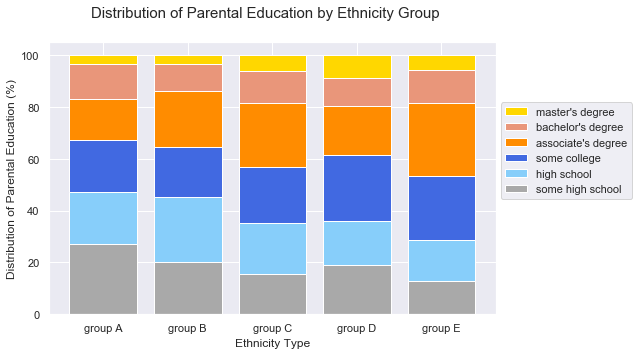

In [7]:
#Creating Stacked BarChart representing Distribution of Parental Education by Ethnicity.

seaborn.set()
fig, ax = plt.subplots(figsize = (8,5))
fig.suptitle("Distribution of Parental Education by Ethnicity Group", fontsize = 15)
graph1=ax.bar(xvalues, data[0], color ="darkgrey")
graph2=ax.bar(xvalues, data[1], bottom = data[0], color = "lightskyblue")
graph3=ax.bar(xvalues, data[2], bottom = data[0]+ data[1],color ="royalblue")
graph4=ax.bar(xvalues, data[3], bottom = data[0]+ data[1]+ data[2],color ="darkorange")
graph5=ax.bar(xvalues, data[4], bottom = data[0]+ data[1]+ data[2]+ data[3], color = "darksalmon")
graph6=ax.bar(xvalues, data[5], bottom = data[0]+ data[1]+ data[2]+ data[3]+ data[4], color ="gold")
ax.set_ylabel("Distribution of Parental Education (%)")
ax.set_xlabel("Ethnicity Type")

plt.legend((graph6[0],graph5[0],graph4[0], graph3[0],graph2[0],graph1[0]), education[::-1], bbox_to_anchor=(1,0.8))

In [8]:
#Looking at correlation matrix of all variables

corr = alldata.corr()
corr

,gender,ethnicity,parents_education,lunch,test_prep,math_score,reading_score,writing_score
gender,1.000000,0.001502,0.043934,-0.021372,-0.006028,-0.167982,0.244313,0.301225
ethnicity,0.001502,1.000000,0.095906,0.046563,0.017508,0.216415,0.145253,0.165691
parents_education,0.043934,0.095906,1.000000,-0.023259,-0.007143,0.159432,0.190908,0.236715
lunch,-0.021372,0.046563,-0.023259,1.000000,-0.017044,0.350877,0.229560,0.245769
test_prep,-0.006028,0.017508,-0.007143,-0.017044,1.000000,0.177702,0.241780,0.312946
math_score,-0.167982,0.216415,0.159432,0.350877,0.177702,1.000000,0.817580,0.802642
reading_score,0.244313,0.145253,0.190908,0.229560,0.241780,0.817580,1.000000,0.954598
writing_score,0.301225,0.165691,0.236715,0.245769,0.312946,0.802642,0.954598,1.000000


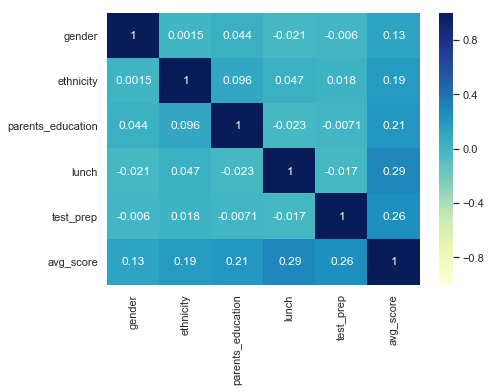

In [20]:
#Using SeaBorn to make a much cleaner correlation matrix 

f,ax = plt.subplots(figsize = (7,5))
corr = alldata.corr() 
seaborn.heatmap(corr,cmap="YlGnBu", vmin = -1, vmax = 1, annot = True)

In [10]:
#Seeing how Lunch Option and Test Prep Option affect Scores in each of 3 subjects.

data3=alldata.loc[:,"lunch":"writing_score"]

noprepnolunch = data3.loc[(data3['test_prep']==0) & (data3["lunch"] == 0)]
noprepnolunch = noprepnolunch.values
print(len(noprepnolunch))
noprepnolunch = (noprepnolunch.sum(axis = 0)/len(noprepnolunch))[2:]
print(noprepnolunch)

noprepyeslunch = data3.loc[(data3['test_prep']==0) & (data3["lunch"] == 1)]
noprepyeslunch = noprepyeslunch.values
print(len(noprepyeslunch))
noprepyeslunch = (noprepyeslunch.sum(axis = 0)/len(noprepyeslunch))[2:]
print(noprepyeslunch)

yesprepnolunch= data3.loc[(data3['test_prep']==1) & (data3["lunch"] == 0)]
yesprepnolunch = yesprepnolunch.values
print(len(yesprepnolunch))
yesprepnolunch = (yesprepnolunch.sum(axis = 0)/len(yesprepnolunch))[2:]
print(yesprepnolunch)

yesprepyeslunch= data3.loc[(data3['test_prep']==1) & (data3["lunch"] == 1)]
yesprepyeslunch = yesprepyeslunch.values
print(len(yesprepyeslunch))
yesprepyeslunch = (yesprepyeslunch.sum(axis = 0)/len(yesprepyeslunch))[2:]
print(yesprepyeslunch)


total = np.vstack((noprepnolunch,noprepyeslunch,yesprepnolunch, yesprepyeslunch ))

224
[56.50892857 61.60267857 58.73660714]
418
[68.13397129 69.17703349 67.59569378]
131
[63.04580153 69.87022901 70.35114504]
227
[73.53303965 76.21585903 76.76651982]


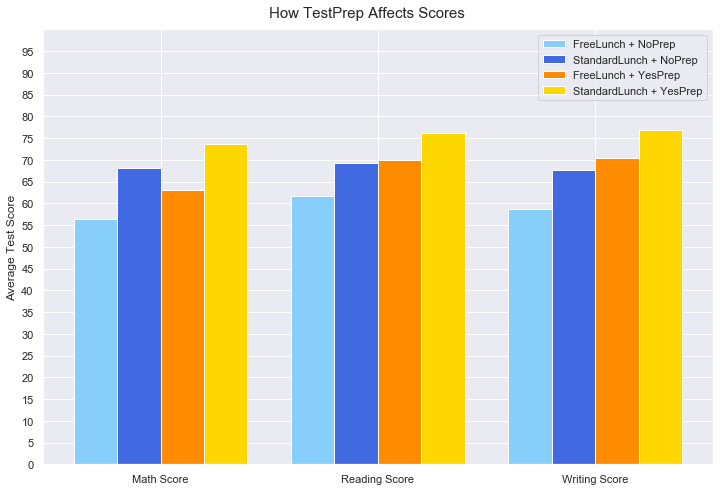

In [11]:
#Creating BarChart of test scores depending on Lunch Option and TestPrep Option

seaborn.set()
fig,ax = plt.subplots(figsize = (12,8))
fig.suptitle("How TestPrep Affects Scores", fontsize = 15, y = 0.92)

ax.set_ylim(0,100)
ax.set_ylabel("Average Test Score")
#OR plt.set_ylabel..

ax.set_xticks([1.1,2.1,3.1])
ax.set_xticklabels(["Math Score", "Reading Score", "Writing Score"])
#OR plt.xticks([1,2,3], ["Math Score", "Reading Score", "Writing Score"])
ax.yaxis.set_ticks(np.arange(0, 100, 5))
#OR plt.yticks(np.arange(0,100,5))
    
plt.bar([0.8,1.8,2.8],total[0], width = 0.2, label = "FreeLunch + NoPrep", color = "lightskyblue")
plt.bar([1,2,3], total[1], width = 0.2, label = "StandardLunch + NoPrep", color = "royalblue")
plt.bar([1.2,2.2,3.2], total[2], width = 0.2, label = "FreeLunch + YesPrep", color ="darkorange")
plt.bar([1.4,2.4,3.4], total[3], width = 0.2, label = "StandardLunch + YesPrep", color = "gold")

plt.legend()

In [12]:
alldata.head()

,gender,ethnicity,parents_education,lunch,test_prep,math_score,reading_score,writing_score
0,1,2,5,1,0,72,72,74
1,1,3,3,1,1,69,90,88
2,1,2,6,1,0,90,95,93
3,0,1,4,0,0,47,57,44
4,0,3,3,1,0,76,78,75


In [13]:
#Looking at Distribution of Scores for Each Subject

math = alldata.loc[:,"math_score"]
reading = alldata.loc[:,"reading_score"]
writing= alldata.loc[:, "writing_score"]

#convert to numpy array (array is regardless of 1D or 2D)
math = math.values 
reading = reading.values 
writing = writing.values 

subjects= [math,reading,writing]
total = []  
for i in range(len(subjects)):
        cat1 = ((subjects[i] >= 0)& (subjects[i] <= 20)).sum()
        cat2 = ((subjects[i] >=21)& (subjects[i] <=30)).sum()
        cat3= ((subjects[i] >=31) & (subjects[i]<=40)).sum()
        cat4= ((subjects[i] >=41) & (subjects[i] <=50)).sum()
        cat5= ((subjects[i] >=51) & (subjects[i] <=60)).sum()
        cat6= ((subjects[i] >=61) & (subjects[i] <=70)).sum()
        cat7= ((subjects[i] >=71) & (subjects[i] <=80)).sum()
        cat8= ((subjects[i] >=81) & (subjects[i] <=90)).sum()
        cat9= ((subjects[i] >=91) & (subjects[i] <=100)).sum()
        total += [[cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9]]
total =np.asarray(total)
total =(np.divide(total,1000))*100
print(total)


xlabel= ["0-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-100"]



[[ 0.4  1.2  3.4 10.  18.9 27.  21.5 12.6  5. ]
 [ 0.1  0.7  1.9  7.  17.8 23.8 25.2 17.3  6.2]
 [ 0.3  0.7  2.5  8.9 17.7 24.3 24.8 14.   6.8]]


Text(0,0.5,'% of Total')

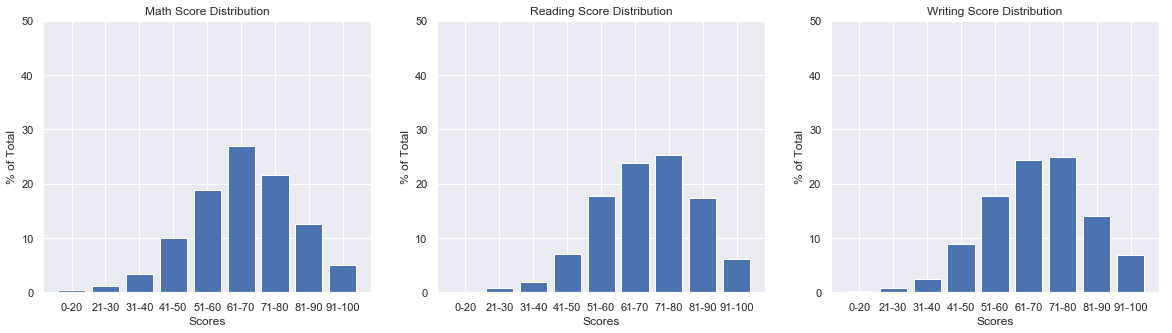

In [14]:
#Generating 3 subplots with score distribution for each subject

seaborn.set()
fig = plt.subplots(figsize =(20,5))

plt.subplot(1,3,1)
plt.title("Math Score Distribution")
axes = plt.gca()
axes.set_ylim([0,50])
plt.bar(xlabel, total[0])
plt.xlabel("Scores")
plt.ylabel("% of Total")

plt.subplot(1,3,2)
plt.title("Reading Score Distribution")
axes = plt.gca()
axes.set_ylim([0,50])
plt.bar(xlabel, total[1])
plt.xlabel("Scores")
plt.ylabel("% of Total")

plt.subplot(1,3,3)
plt.title("Writing Score Distribution")
axes = plt.gca()
axes.set_ylim([0,50])
plt.xlabel("Scores")
plt.bar(xlabel, total[2])
plt.ylabel("% of Total")

Now trying Linear Regression. I aim to predict a students test_score (average of three subjects) using other variables.

In [15]:
#Adding column which is average score of 3 subjects

alldata = alldata.assign(avg_score = lambda x:(x["math_score"]+ x["reading_score"]+x["writing_score"])/3)
alldata = alldata.iloc[:,[0,1,2,3,4,8]]


In [16]:
alldata.head()

,gender,ethnicity,parents_education,lunch,test_prep,avg_score
0,1,2,5,1,0,72.666667
1,1,3,3,1,1,82.333333
2,1,2,6,1,0,92.666667
3,0,1,4,0,0,49.333333
4,0,3,3,1,0,76.333333


In [17]:
#Linear Regression Model using Sk-Learn

from sklearn.model_selection import train_test_split
from sklearn import linear_model
X = alldata[alldata.columns[0:5]]
y = alldata[alldata.columns[5]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regr=linear_model.LinearRegression()
regr.fit(X_train, y_train)
pred_train = regr.predict(X_train)
pred_test = regr.predict(X_test)

Text(0.5,1,'Residual Plot')

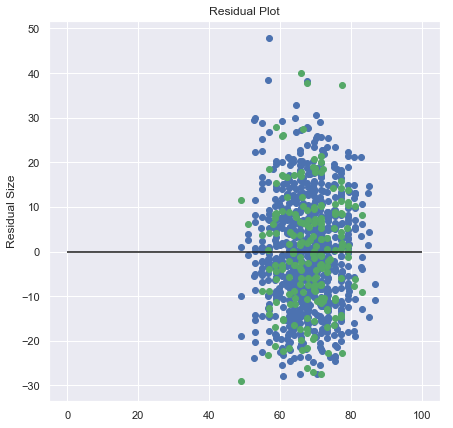

In [18]:
#Looking at the size of the residuals. Ideally, the points would be scattered as close to zero as possible.

fig,ax = plt.subplots(figsize = (7,7))
ax.set_ylabel("Residual Size")

plt.scatter(regr.predict(X_train), regr.predict(X_train)- y_train, c = "b")
plt.scatter(regr.predict(X_test), regr.predict(X_test)- y_test, c="g")
plt.hlines(y=0, xmin = 0, xmax = 100)
plt.title("Residual Plot")

In [19]:
#Evaluating the model using R squared and MRSE. 

from math import sqrt
from scipy import stats
from sklearn.metrics import mean_squared_error

coefficients = regr.coef_

#r-squared
r_squared = regr.score(X_test, y_test)
r_squared = r_squared *100
r_squared = str(round(r_squared,2))

#mrse
mrse = sqrt(mean_squared_error(y_test, pred_test))
mrse = str(round(mrse,2))

print(r_squared +"% of the variation in testscores is explained by gender, ethnicity, parentseducation, \
lunchoption, and testpreparation. The most important factors which determine TestScores are LunchOption and TestPreparation which have coeff.  values of " \
      + str(round(coefficients[3],2)) + " and " + str(round(coefficients[4],2)) + ", followed by " + "gender, ethnicity, and parents education." \
" On average,the score predicted by this regression is " + mrse + " points off from the actual score that a student gets.")

19.24% of the variation in testscores is explained by gender, ethnicity, parentseducation, lunchoption, and testpreparation. The most important factors which determine TestScores are LunchOption and TestPreparation which have coeff.  values of 8.9 and 7.59, followed by gender, ethnicity, and parents education. On average,the score predicted by this regression is 12.78 points off from the actual score that a student gets.
